In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix

In [57]:
df = pd.read_csv("data/df_eda1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          209222 non-null  object 
 1   currency         209222 non-null  object 
 2   deadline         209222 non-null  object 
 3   launched_at      209222 non-null  object 
 4   state            209222 non-null  object 
 5   goal_usd         209222 non-null  float64
 6   name_len         209222 non-null  int64  
 7   category         209222 non-null  object 
 8   delta_dead_laun  209222 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 14.4+ MB


In [58]:
# convert 'state' to numerical
# successful: 1
# failed: 0
# drop: live, suspended, canceled

df = df.query('state != "live"')
df = df.query('state != "suspended"')
df = df.query('state != "canceled"')
print(df['state'].unique()) # check that 'state' only contains failed and successful

#df['state'].replace({'failed':0, 'successful':1}, inplace=True)
#print(df['state'].unique()) # check that 'state' only contains 1 and 0


['successful' 'failed']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 1 to 209221
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          192664 non-null  object 
 1   currency         192664 non-null  object 
 2   deadline         192664 non-null  object 
 3   launched_at      192664 non-null  object 
 4   state            192664 non-null  object 
 5   goal_usd         192664 non-null  float64
 6   name_len         192664 non-null  int64  
 7   category         192664 non-null  object 
 8   delta_dead_laun  192664 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 18.7+ MB


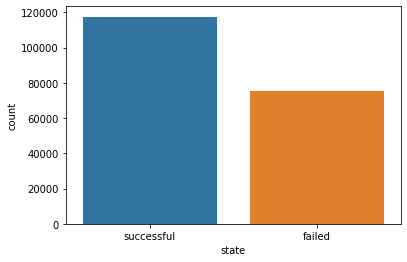

In [59]:
# plot frequency of success and failure

sns.countplot(x='state', data=df)
df.info()


In [60]:
# drop launched_at, deadline, currency

df.drop(['launched_at', 'deadline', 'currency'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 1 to 209221
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          192664 non-null  object 
 1   state            192664 non-null  object 
 2   goal_usd         192664 non-null  float64
 3   name_len         192664 non-null  int64  
 4   category         192664 non-null  object 
 5   delta_dead_laun  192664 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.3+ MB


In [61]:
df.describe()

,goal_usd,name_len,delta_dead_laun
count,1.926640e+05,192664.000000,192664.000000
mean,3.712954e+04,35.148377,777.272739
std,1.038361e+06,15.695316,279.553975
min,1.000000e-02,1.000000,24.000000
25%,1.500000e+03,22.000000,719.000000
50%,4.993790e+03,35.000000,720.000000
75%,1.200000e+04,49.000000,806.000000
max,1.325680e+08,85.000000,2234.000000


## Outliers

In [62]:
low = df.query('goal_usd < 100')
len(low)

3039

In [63]:
high = df.query('goal_usd > 1000000')
len(high)

455

## Decision

Exclude project with goals under 100 and over 1,000,000

https://www.wired.com/2012/10/least-ambitious-kickstarters/

In [64]:
# exclude outliers
df = df.query('goal_usd > 100 and goal_usd < 1000000')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187812 entries, 1 to 209221
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          187812 non-null  object 
 1   state            187812 non-null  object 
 2   goal_usd         187812 non-null  float64
 3   name_len         187812 non-null  int64  
 4   category         187812 non-null  object 
 5   delta_dead_laun  187812 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.0+ MB


<AxesSubplot:xlabel='goal_usd'>

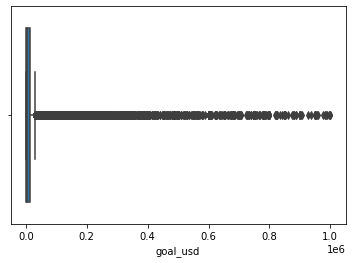

In [65]:
sns.boxplot(x='goal_usd', data=df)

<AxesSubplot:xlabel='goal_usd', ylabel='Count'>

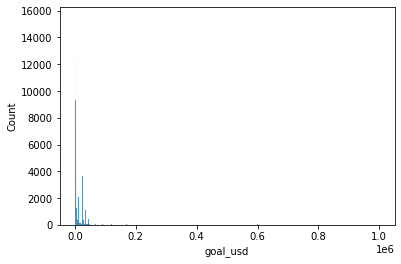

In [66]:
sns.histplot(x='goal_usd', data=df)

### log transform goal_usd (very, very skewed)



In [67]:
df['goal_usd'] = np.log(df['goal_usd'])
df.head()

,country,state,goal_usd,name_len,category,delta_dead_laun
1,US,successful,6.907755,23,"""slug"":""games/playing cards""",720.0
2,US,successful,9.615805,51,"""slug"":""music/rock""",720.0
3,GB,failed,9.479141,34,"""slug"":""games/playing cards""",1439.0
4,US,successful,7.937375,40,"""slug"":""publishing/nonfiction""",720.0
5,US,successful,8.160518,31,"""slug"":""music/classical music""",720.0


<AxesSubplot:xlabel='goal_usd', ylabel='Count'>

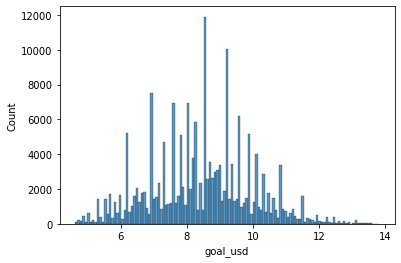

In [68]:
sns.histplot(x='goal_usd', data=df)

In [69]:
df.rename(columns={'goal_usd':'goal_usd_log'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187812 entries, 1 to 209221
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          187812 non-null  object 
 1   state            187812 non-null  object 
 2   goal_usd_log     187812 non-null  float64
 3   name_len         187812 non-null  int64  
 4   category         187812 non-null  object 
 5   delta_dead_laun  187812 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.0+ MB


<AxesSubplot:xlabel='country', ylabel='Count'>

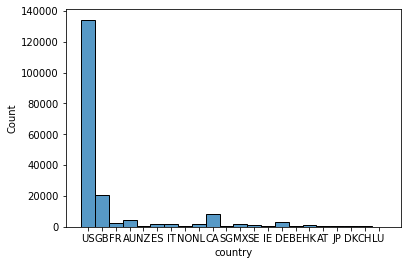

In [70]:
sns.histplot(x='country', data=df)

<AxesSubplot:xlabel='name_len', ylabel='Count'>

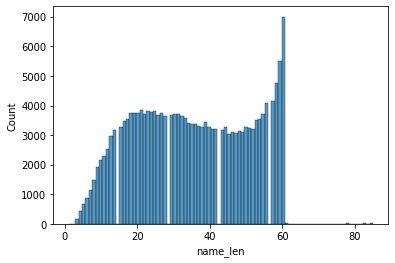

In [71]:
sns.histplot(x='name_len', data=df)

In [72]:
short = df.query('name_len < 3')
short.head()
#len(short)
# we'll leave everything in because very short names are possible

,country,state,goal_usd_log,name_len,category,delta_dead_laun
6770,US,successful,7.313220,2,"""slug"":""dance""",683.0
14559,US,failed,10.221941,1,"""slug"":""film & video/drama""",720.0
27513,US,failed,9.210340,2,"""slug"":""technology/apps""",720.0
32732,GB,successful,6.273390,1,"""slug"":""film & video/drama""",235.0
42356,FR,successful,7.434050,2,"""slug"":""theater""",719.0


In [73]:
# log
#df['name_len_log'] = np.log(df['name_len'])
#sns.histplot(x='name_len_log', data=df)


In [74]:
#df['name_len_sqrt'] = np.sqrt(df['name_len'])
#sns.histplot(x='name_len_sqrt', data=df)

<AxesSubplot:xlabel='category', ylabel='Count'>

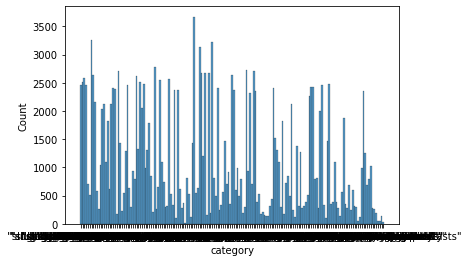

In [75]:
sns.histplot(x='category', data=df)

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

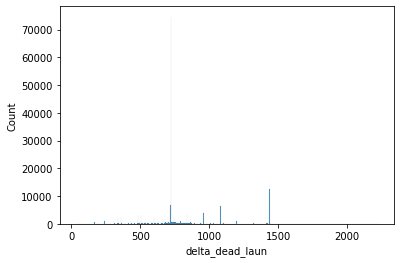

In [76]:
sns.histplot(x='delta_dead_laun', data=df)

<AxesSubplot:xlabel='delta_dead_laun'>

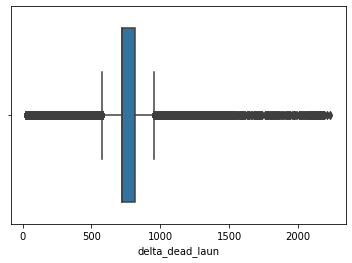

In [77]:
sns.boxplot(x='delta_dead_laun', data=df)

In [78]:
df.describe()

,goal_usd_log,name_len,delta_dead_laun
count,187812.000000,187812.000000,187812.000000
mean,8.431109,35.220353,779.703230
std,1.547815,15.703031,276.715503
min,4.615121,1.000000,24.000000
25%,7.313220,22.000000,719.000000
50%,8.517193,35.000000,720.000000
75%,9.433484,49.000000,813.000000
max,13.815510,85.000000,2234.000000


In [79]:
## save dataframe

df.to_csv( "data/df_eda2.csv", index=False, encoding='utf-8-sig')